# Question 1: Price prediction by traditional ML

In [83]:
# # nếu chạy trên google colab
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

## 1. Đọc và chuẩn bị dữ liệu

In [85]:
# nếu chạy local
data = pd.read_excel("data_motobikes.xlsx")

# # nếu chạy trên colab
# # drive chị Ngọc Anh
# data = pd.read_excel("/content/gdrive/MyDrive/shared_folder/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/data_motobikes.xlsx")
# # drive Quỳnh Anh
# # data = pd.read_excel("/content/gdrive/MyDrive/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/data_motobikes.xlsx")

In [86]:
data.head(3) # đổi df ban đầu là "data", trong quá trình prep là "df" luôn

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",66.000.000 đ,72.53 tr,85.14 tr,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,2024,14000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
1,2,🔥🔥SH 150i Thắng ABS 2019 BSTP Chính Chủ,79.500.000 đ,62.76 tr,73.68 tr,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh","_Bán SH 150i Thắng ABS 2019 Xám Bạc, Úp Team X...",Honda,SH,2019,28000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,37.000.000 đ,28 tr,32.86 tr,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,2023,12000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...


In [87]:
data.tail(3)

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
7205,7206,Bán xe Yamaha Janus 2017 FI smart key màu xanh,13.500.000 đ,12.97 tr,15.23 tr,"Thị trấn Nhà Bè, Huyện Nhà Bè, Tp Hồ Chí Minh","Bán xe Yamaha Janus 2017 FI smart key, màu xan...",Yamaha,Janus,2017,49000,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7206,7207,Bán xe Future Đời đầu Chính Chủ,10.500.000 đ,14.16 tr,16.63 tr,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Xe cũ theo năm tháng những vẫn còn đẹp và liền...,Honda,Future,2000,80000,Đã sử dụng,Xe số,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7207,7208,Bán Ducati Scrambler 2020 chính chủ cavet BSSG,225.000.000 đ,NaN,NaN,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Đổi xe nên bán Ducati scrambler sản xuất 2019 ...,Ducati,Scrambler,2020,30000,Đã sử dụng,Tay côn/Moto,Trên 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...


In [88]:
data.describe(include='all')

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
count,7208.000000,7207,7206,7006,7011,7167,7208,7205,7205,7208,7208.000000,7208,7208,7208,7208,7207,7207,7208
unique,NaN,6839,741,1304,1348,310,7183,37,195,79,NaN,2,3,7,12,1,1,7196
top,NaN,Bán xe,25.000.000 đ,23.44 tr,7.94 tr,"Phường Bình Hưng Hoà A, Quận Bình Tân, Tp Hồ C...",Mình cần bán xe như hình \nXe giấy tờ đầy đủ n...,Honda,Wave,2019,NaN,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
freq,NaN,29,138,43,54,113,10,4374,727,482,NaN,7207,3600,5857,2875,7207,7207,3
mean,3604.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64378.889012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2080.914703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136573.455355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1802.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3604.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5406.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53327.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7208 non-null   int64 
 1   Tiêu đề              7207 non-null   object
 2   Giá                  7206 non-null   object
 3   Khoảng giá min       7006 non-null   object
 4   Khoảng giá max       7011 non-null   object
 5   Địa chỉ              7167 non-null   object
 6   Mô tả chi tiết       7208 non-null   object
 7   Thương hiệu          7205 non-null   object
 8   Dòng xe              7205 non-null   object
 9   Năm đăng ký          7208 non-null   object
 10  Số Km đã đi          7208 non-null   int64 
 11  Tình trạng           7208 non-null   object
 12  Loại xe              7208 non-null   object
 13  Dung tích xe         7208 non-null   object
 14  Xuất xứ              7208 non-null   object
 15  Chính sách bảo hành  7207 non-null   object
 16  Trọng 

In [90]:
data.columns

Index(['id', 'Tiêu đề', 'Giá', 'Khoảng giá min', 'Khoảng giá max', 'Địa chỉ',
       'Mô tả chi tiết', 'Thương hiệu', 'Dòng xe', 'Năm đăng ký',
       'Số Km đã đi', 'Tình trạng', 'Loại xe', 'Dung tích xe', 'Xuất xứ',
       'Chính sách bảo hành', 'Trọng lượng', 'Href'],
      dtype='object')

In [91]:
data.shape

(7208, 18)

In [92]:
# Xóa các cột không cần thiết
cols_to_drop = ['id', 'Tiêu đề', 'Địa chỉ', 'Mô tả chi tiết', 'Href']

df = data.drop(cols_to_drop, axis=1)
df.columns

Index(['Giá', 'Khoảng giá min', 'Khoảng giá max', 'Thương hiệu', 'Dòng xe',
       'Năm đăng ký', 'Số Km đã đi', 'Tình trạng', 'Loại xe', 'Dung tích xe',
       'Xuất xứ', 'Chính sách bảo hành', 'Trọng lượng'],
      dtype='object')

In [93]:
# Đổi tên các cột để đơn giản hóa
df = df.rename(columns={
    'Giá': 'price',
    'Khoảng giá min': 'min_price',
    'Khoảng giá max': 'max_price',
    'Thương hiệu': 'brand',
    'Dòng xe': 'model',
    'Năm đăng ký': 'registration_year',
    'Số Km đã đi': 'mileage_km',
    'Tình trạng': 'condition',
    'Loại xe': 'bike_type',
    'Dung tích xe': 'engine_capacity',
    'Xuất xứ': 'origin',
    'Chính sách bảo hành': 'warranty_policy',
    'Trọng lượng': 'weight'
})
df.columns

Index(['price', 'min_price', 'max_price', 'brand', 'model',
       'registration_year', 'mileage_km', 'condition', 'bike_type',
       'engine_capacity', 'origin', 'warranty_policy', 'weight'],
      dtype='object')

In [94]:
# Kiểm tra số lượng giá trị duy nhất trong mỗi cột

for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
    if df[col].nunique() < 38: # check for nulls in 'brand'
        print(df[col].unique())

price: 741
min_price: 1304
max_price: 1348
brand: 37
['Piaggio' 'Honda' 'Yamaha' 'SYM' 'Kawasaki' 'Hãng khác' 'KTM' 'Suzuki'
 'Peugeot' 'Royal Enfield' 'Triumph' 'Victory' 'Kymco' 'Taya' 'Ducati' nan
 'Benelli' 'Hyosung' 'VinFast' 'Detech' 'Harley Davidson' 'Brixton' 'BMW'
 'Keeway' 'GPX' 'RebelUSA' 'Halim' 'Sanda' 'Nioshima' 'Daelim' 'Sachs'
 'Aprilia' 'Bazan' 'CR&S' 'Moto Guzzi' 'Vento' 'Kengo' 'Visitor']
model: 195
registration_year: 79
mileage_km: 1323
condition: 2
['Đã sử dụng' 'Mới']
bike_type: 3
['Tay ga' 'Xe số' 'Tay côn/Moto']
engine_capacity: 7
['100 - 175 cc' 'Dưới 50 cc' '50 - 100 cc' 'Trên 175 cc' 'Không biết rõ'
 'Đang cập nhật' 'Nhật Bản']
origin: 12
['Đang cập nhật' 'Nhật Bản' 'Việt Nam' 'Nước khác' 'Đài Loan' 'Thái Lan'
 'Trung Quốc' 'Mỹ' 'Hàn Quốc' 'Ấn Độ' 'Đức' 'Bảo hành hãng']
warranty_policy: 1
['Bảo hành hãng' nan]
weight: 1
['> 50 kg' nan]


warranty_policy and weight columns only have 1 category -> drop them

In [95]:
# Kiểm tra các giá trị null
df.isnull().sum()

price                  2
min_price            202
max_price            197
brand                  3
model                  3
registration_year      0
mileage_km             0
condition              0
bike_type              0
engine_capacity        0
origin                 0
warranty_policy        1
weight                 1
dtype: int64

In [96]:
# Xóa các giá trị null
df = df.dropna().reset_index(drop=True)

In [97]:
df = df.drop(columns=['warranty_policy', 'weight']).reset_index(drop=True)


In [98]:
df.tail(2)

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,origin
7003,13.500.000 đ,12.97 tr,15.23 tr,Yamaha,Janus,2017,49000,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam
7004,10.500.000 đ,14.16 tr,16.63 tr,Honda,Future,2000,80000,Đã sử dụng,Xe số,100 - 175 cc,Việt Nam


In [99]:
# Chỉnh lại kiểu dữ liệu của "price"

# df = df_prep.copy() (đã chuyển ở trên)
df['price'] = (
    df['price']
    .astype(str)
    .str.replace('[^0-9]', '', regex=True)   # chỉ giữ lại chữ số
    .replace('', np.nan)
    .astype(float)
)

In [100]:
# Chuyển các chuỗi trong "min_price" và "max_price" thành giá trị số

def parse_minmax_price(s): # turn s into numeric
    if pd.isna(s):
        return np.nan
    s = str(s).lower().replace("tr", "").replace(" ", "")
    try:
        return float(s) * 1_000_000
    except:
        return np.nan

df['min_price'] = df['min_price'].apply(parse_minmax_price)
df['max_price'] = df['max_price'].apply(parse_minmax_price)

In [101]:
df.head(3)

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,origin
0,66000000.0,72530000.0,85140000.0,Piaggio,Vespa,2024,14000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật
1,79500000.0,62760000.0,73680000.0,Honda,SH,2019,28000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật
2,37000000.0,28000000.0,32860000.0,Honda,Vision,2023,12000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật


In [102]:
# Check the info after correcting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7005 entries, 0 to 7004
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              7005 non-null   float64
 1   min_price          7005 non-null   float64
 2   max_price          7005 non-null   float64
 3   brand              7005 non-null   object 
 4   model              7005 non-null   object 
 5   registration_year  7005 non-null   object 
 6   mileage_km         7005 non-null   int64  
 7   condition          7005 non-null   object 
 8   bike_type          7005 non-null   object 
 9   engine_capacity    7005 non-null   object 
 10  origin             7005 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 602.1+ KB


In [103]:
df.describe(include='all')

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,origin
count,7.005000e+03,7.005000e+03,7.005000e+03,7005,7005,7005,7005.000000,7005,7005,7005,7005
unique,NaN,NaN,NaN,34,171,77,NaN,1,3,7,12
top,NaN,NaN,NaN,Honda,Wave,2019,NaN,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam
freq,NaN,NaN,NaN,4318,726,468,NaN,7005,3528,5744,2837
mean,4.927507e+07,2.389876e+07,2.805514e+07,NaN,NaN,NaN,64225.326624,NaN,NaN,NaN,NaN
std,1.625846e+09,2.993058e+07,3.513602e+07,NaN,NaN,NaN,136554.383722,NaN,NaN,NaN,NaN
min,0.000000e+00,1.230000e+06,1.440000e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,8.500000e+06,7.980000e+06,9.370000e+06,NaN,NaN,NaN,10000.000000,NaN,NaN,NaN,NaN
50%,1.650000e+07,1.453000e+07,1.705000e+07,NaN,NaN,NaN,28000.000000,NaN,NaN,NaN,NaN
75%,3.200000e+07,2.832000e+07,3.325000e+07,NaN,NaN,NaN,53284.000000,NaN,NaN,NaN,NaN


In [104]:
# Kiểm tra thông tin sau khi chỉnh sửa kiểu dữ liệu

df = df[~(df['price'] == 0)]
df.shape

(7004, 11)

## 2. Xem phân phối tổng thể xác định outlier

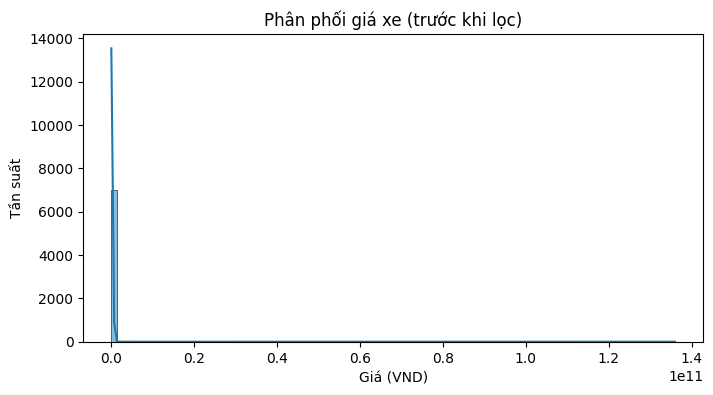

count    7.004000e+03
mean     4.928211e+07
std      1.625962e+09
min      1.000000e+00
25%      8.500000e+06
50%      1.650000e+07
75%      3.200000e+07
max      1.360000e+11
Name: price, dtype: float64


In [105]:
# Kiểm tra phân bố giá bằng biểu đồ histplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Phân phối giá xe (trước khi lọc)")
plt.xlabel("Giá (VND)")
plt.ylabel("Tần suất")

# Lưu hình
# QA drive
# plt.savefig("/content/gdrive/MyDrive/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/prep/price_hist_before_filter.png")
# NA drive
# plt.savefig("/content/gdrive/MyDrive/shared_folder/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/prep/price_hist_before_filter.png")

plt.show()

print(df['price'].describe())

In [106]:
# Đánh giá độ lệch (skew) và độ nhọn (kurtosis)

from scipy.stats import skew, kurtosis

price_skew = skew(df['price'])
price_kurt = kurtosis(df['price'])

print(f"Độ lệch (skewness): {price_skew:.2f}")
print(f"Độ nhọn (kurtosis): {price_kurt:.2f}")


Độ lệch (skewness): 83.48
Độ nhọn (kurtosis): 6977.11


#### => Phân phối lệch phải mạnh, nhọn -> cần xử lý loại outlier và log transform để xử lý. Chúng tôi quyết định với outlier sẽ loại theo từng 'segment' chứ không loại tổng thể, vì với từng segment sẽ có phân khúc xe khác nhau. Nếu chỉ loại theo tổng thể có thể sẽ mất đi các giá trị có ý nghĩa của các phân khúc xe khác nhau. Chi tiết sẽ được xử lý ở phần "3. Feature engineering"

## 3. Feature engineering

In [107]:
# Kiểm tra số lượng giá trị duy nhất trong mỗi cột

for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
    if df[col].nunique() < 38:
        print(df[col].unique())

price: 729
min_price: 1304
max_price: 1347
brand: 34
['Piaggio' 'Honda' 'Yamaha' 'SYM' 'Kawasaki' 'Hãng khác' 'KTM' 'Suzuki'
 'Peugeot' 'Triumph' 'Victory' 'Kymco' 'Taya' 'Ducati' 'Benelli' 'Hyosung'
 'Detech' 'Brixton' 'BMW' 'GPX' 'Halim' 'Keeway' 'Sanda' 'Harley Davidson'
 'Nioshima' 'Daelim' 'VinFast' 'Sachs' 'Royal Enfield' 'Bazan' 'RebelUSA'
 'Vento' 'Aprilia' 'Visitor']
model: 171
registration_year: 77
mileage_km: 1295
condition: 1
['Đã sử dụng']
bike_type: 3
['Tay ga' 'Xe số' 'Tay côn/Moto']
engine_capacity: 7
['100 - 175 cc' 'Dưới 50 cc' '50 - 100 cc' 'Trên 175 cc' 'Không biết rõ'
 'Đang cập nhật' 'Nhật Bản']
origin: 12
['Đang cập nhật' 'Nhật Bản' 'Việt Nam' 'Nước khác' 'Đài Loan' 'Thái Lan'
 'Trung Quốc' 'Hàn Quốc' 'Ấn Độ' 'Đức' 'Mỹ' 'Bảo hành hãng']


In [108]:
# drop column condition vì có 1 giá trị
df = df.drop(columns=['condition'])

In [109]:
# Drop invalid value in "engine_capacity"
df['engine_capacity'][df['engine_capacity'] == 'Nhật Bản'].count()

1

In [110]:
df = df[~df['engine_capacity'].astype(str).str.contains('Nhật Bản', case=False, na=False)]

In [111]:
# Thay thế các giá trị không rõ trong 'engine_capacity' bằng 'Unknown'

df['engine_capacity'] = df['engine_capacity'].replace(
    ['Không biết rõ', 'Đang cập nhật'],
    'Unknown'
)

In [112]:
# Kiểm tra lại
df['engine_capacity'].unique()

array(['100 - 175 cc', 'Dưới 50 cc', '50 - 100 cc', 'Trên 175 cc',
       'Unknown'], dtype=object)

In [113]:
# Loại bỏ giá trị không hợp lệ trong "origin"

df['origin'][df['origin'] == 'Bảo hành hãng'].count()

8

In [114]:
df = df[~df['origin'].astype(str).str.contains('Bảo hành hãng', case=False, na=False)]

In [115]:
# Thay thế các giá trị không rõ trong "origin" bằng "Nước khác"

df['origin'] = df['origin'].replace(
    ['Đang cập nhật', 'Nước khác'],
    'Nước khác'
)

In [116]:
df['origin'].unique()

array(['Nước khác', 'Nhật Bản', 'Việt Nam', 'Đài Loan', 'Thái Lan',
       'Trung Quốc', 'Hàn Quốc', 'Ấn Độ', 'Đức', 'Mỹ'], dtype=object)

In [117]:
# Chuẩn hóa "registration_year"
# Kiểm tra các giá trị không hợp lệ
df['registration_year'].unique()

array(['2024', '2019', '2023', '2021', '2018', '2013', '2003', '2015',
       '2020', 'trước năm 1980', '2005', '2016', '2014', '2001', '2022',
       '2008', '2010', '2011', '2009', '2012', '2004', '2017', '1998',
       '2007', '1997', '2025', '2006', '2000', 2019, 2012, 2002, 2018,
       2017, 2011, 2014, 2024, 2022, 2008, 2010, 2001, 2015, 2021, 2000,
       1998, 2016, 2020, 2009, 2013, 2023, 2007, 2006, 1997, 2005, 1996,
       '2002', '1995', '1996', 1999, 2004, 1994, 2003, '1987', '1993',
       '1990', '1992', '1999', '1981', '1982', '1994', 2025, 1995, '1986',
       '1991', '1985', '1989', '1984', '1988'], dtype=object)

In [118]:
# Chuẩn hóa "registration_year"
df['registration_year'] = (
    df['registration_year']
    .astype(str)
    .str.lower()
    .str.replace('trước năm', '1980', regex=False)  # thay cụm 'trước năm 1980' bằng '1980'
    .str.extract('(\d{4})')[0]                      # lấy 4 chữ số đầu tiên (nếu có)
)

In [119]:
# Chuyển sang kiểu số, các giá trị không phải số sẽ trở thành NaN
df['registration_year'] = pd.to_numeric(df['registration_year'], errors='coerce')

In [120]:
# Loại bỏ các giá trị không hợp lệ (nếu có, ví dụ >2025) bằng cách chuyển chúng thành NaN
df.loc[(df['registration_year'] < 1980) | (df['registration_year'] > 2025), 'registration_year'] = np.nan

In [121]:
# Tạo feature "age" từ "registration_year"
current_year = 2025 # update year if needed
df['age'] = current_year - df['registration_year']

In [122]:
# Nhóm các thương hiệu và mẫu xe
# Đếm số lượng thương hiệu và mẫu xe

brand_counts = df['brand'].value_counts()
model_counts = df['model'].value_counts()

print("Số lượng hãng trước khi nhóm:", len(brand_counts))
print("Số lượng dòng trước khi nhóm:", len(model_counts))

Số lượng hãng trước khi nhóm: 34
Số lượng dòng trước khi nhóm: 171


In [123]:
print("Số lượng hãng:", df['brand'].nunique())
print("Top 20 nhãn hàng:")
print(df['brand'].value_counts().head(20))  # top 20 nhãn hàng


Số lượng hãng: 34
Top 20 nhãn hàng:
brand
Honda              4309
Yamaha             1392
Piaggio             364
Suzuki              262
SYM                 235
Hãng khác           230
Kawasaki             52
Kymco                25
Detech               15
GPX                  11
Ducati               10
Halim                10
Triumph               9
Benelli               8
BMW                   8
Daelim                8
Harley Davidson       7
Peugeot               6
Nioshima              5
Hyosung               5
Name: count, dtype: int64


In [124]:
# Group nhóm hiếm/ ít
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 50].index
df['brand_grouped'] = df['brand'].replace(rare_brands, 'Hãng khác')

In [125]:
print("Số lượng mẫu xe trước khi nhóm", df['model'].nunique())
print("# top 20 dòng phổ biến:")
print(df['model'].value_counts().head(20))  # top 20 model phổ biến

Số lượng mẫu xe trước khi nhóm 171
# top 20 dòng phổ biến:
model
Wave         725
SH           627
Air Blade    603
Dòng khác    492
Exciter      474
Vision       281
Future       238
Vario        226
Sirius       211
Lead         205
Vespa        203
Dream        182
Winner X     177
Winner       157
Nouvo        150
Cub          146
Mio          108
Attila        94
SH Mode       79
Janus         74
Name: count, dtype: int64


In [126]:
# Tạo hàm để nhóm các dòng xe ít phổ biến
def group_model(x):
    counts = x.value_counts()
    rare_models = counts[counts < 100].index
    return x.replace(rare_models, 'Dòng khác')
# Group the models by brands and apply the minor grouping
df['model_grouped'] = df.groupby('brand_grouped')['model'].transform(group_model)

In [127]:
# Kiểm tra xem các giá trị "Dòng khác" có chiếm ưu thế hay không
# Đếm dòng xe đã group
model_grouped_counts = df['model_grouped'].value_counts()

# Tổng "Dòng khác"
dong_khac_count = model_grouped_counts.get('Dòng khác', 0)

# Tổng số dòng
total_records = len(df)

# Tính tỷ lệ %
dong_khac_percent = dong_khac_count / total_records * 100

print(f"Tổng số dòng: {total_records:,}")
print(f"Tổng 'Dòng khác': {dong_khac_count:,}")
print(f"Phần trăm 'Dòng khác': {dong_khac_percent:.2f}%")

Tổng số dòng: 6,995
Tổng 'Dòng khác': 2,285
Phần trăm 'Dòng khác': 32.67%


In [128]:
# Đếm số lượng thương hiệu và mẫu xe sau khi nhóm
brand_counts = df['brand_grouped'].value_counts()
model_counts = df['model_grouped'].value_counts()

print("Số lượng hãng sau khi nhóm:", len(brand_counts))
print("Số lượng dòng sau khi nhóm:", len(model_counts))

Số lượng hãng sau khi nhóm: 7
Số lượng dòng sau khi nhóm: 17


In [129]:
# Tạo feature mới 'segment' bằng cách ghép các thương hiệu và mẫu xe đã nhóm
df['segment'] = df['brand_grouped'] + '_' + df['model_grouped']
print(f"No. of unique values: {df['segment'].nunique()}")
print(df['segment'].value_counts().head(20))

No. of unique values: 23
segment
Honda_Dòng khác        745
Honda_Wave             725
Honda_SH               627
Honda_Air Blade        603
Yamaha_Exciter         474
Yamaha_Dòng khác       449
Hãng khác_Dòng khác    381
Honda_Vision           281
Suzuki_Dòng khác       262
Honda_Future           238
SYM_Dòng khác          235
Honda_Vario            226
Yamaha_Sirius          211
Honda_Lead             205
Piaggio_Vespa          203
Honda_Dream            182
Honda_Winner X         177
Piaggio_Dòng khác      161
Honda_Winner           157
Yamaha_Nouvo           150
Name: count, dtype: int64


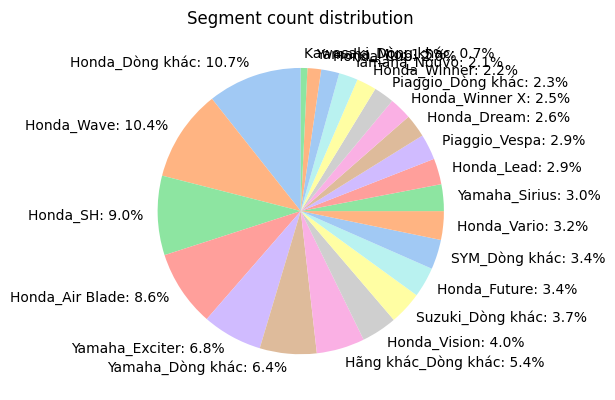

In [130]:
# Trực quan hóa các segments

# Count rows per segment
segment_counts = df['segment'].value_counts()
# Compute percentages
percentages = (segment_counts / segment_counts.sum() * 100).round(1)
# Combine segment names with percentages
labels = [f"{seg}: {pct}%" for seg, pct in zip(segment_counts.index, percentages)]
# Use a pastel color palette from Seaborn
colors = sns.color_palette("pastel", len(segment_counts))

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    segment_counts.values,
    labels=labels,           # use combined labels
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10},
    labeldistance=1.1,       # move labels slightly outside
)
plt.title('Segment count distribution', fontsize=12)
plt.tight_layout()

# Save figure
# filename = "/content/gdrive/MyDrive/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/feature_eng/segment_piechart.png"
# filename = "/content/gdrive/MyDrive/shared_folder/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/feature_eng/segment_piechart.png"
# plt.savefig(filename, dpi=300)

plt.show()

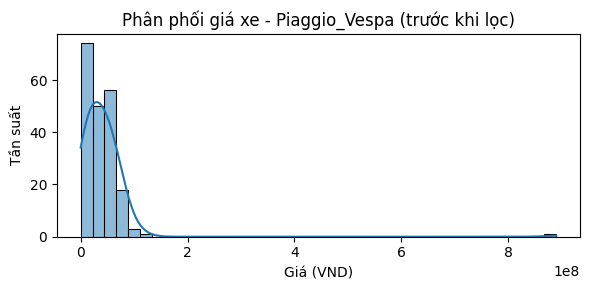

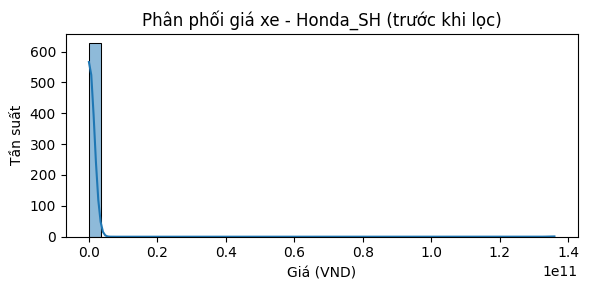

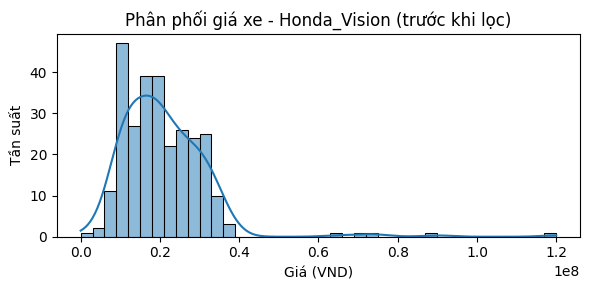

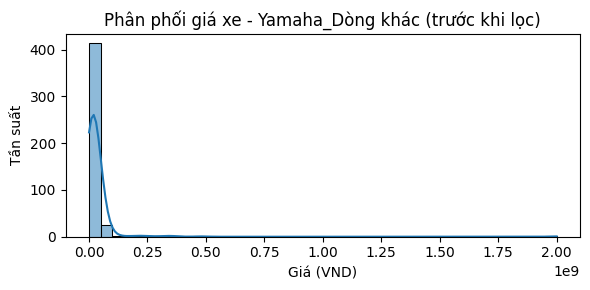

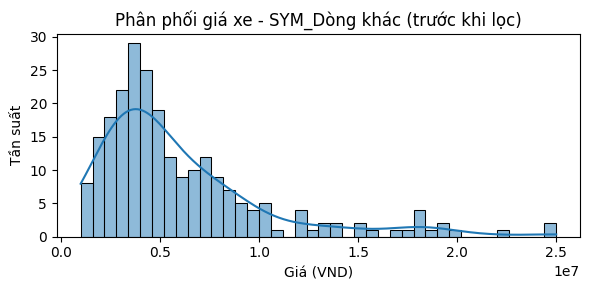

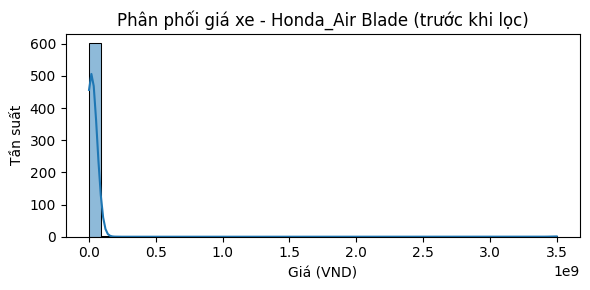

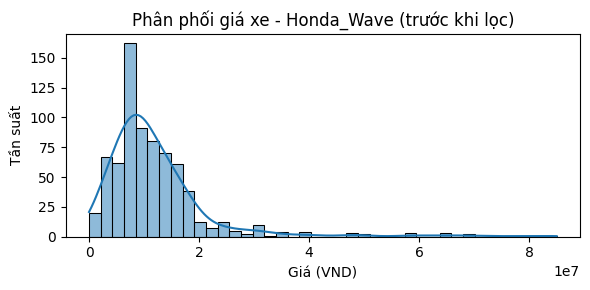

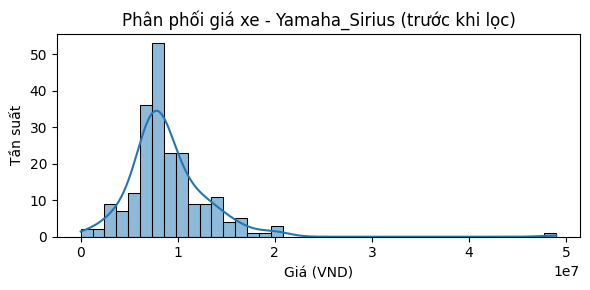

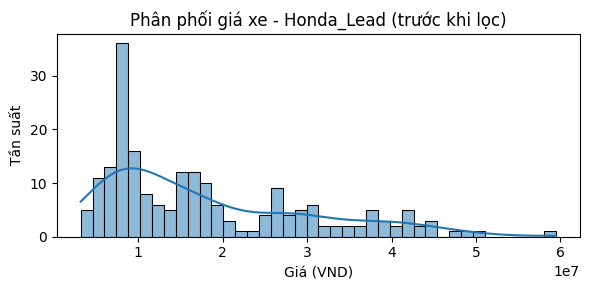

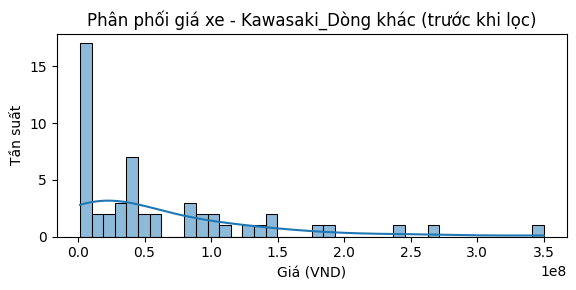

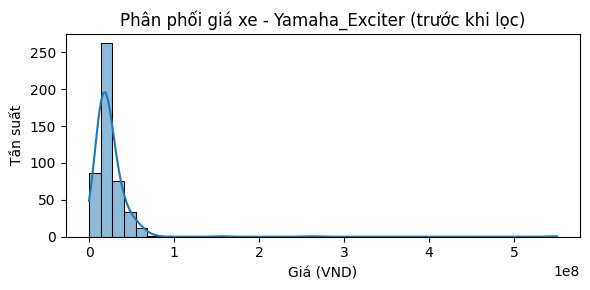

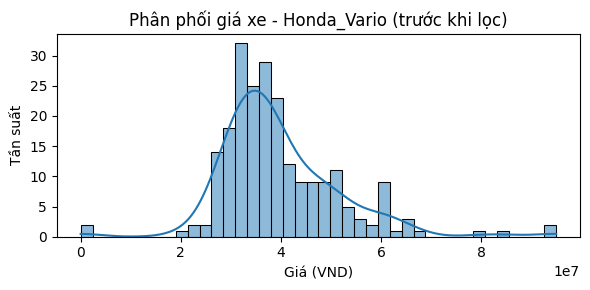

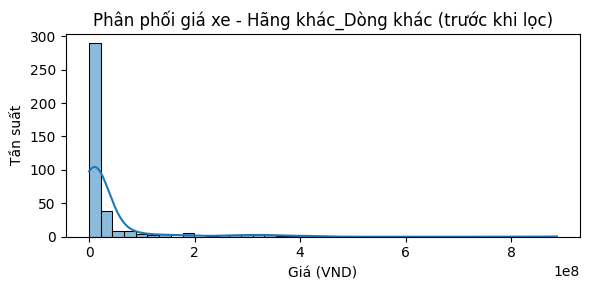

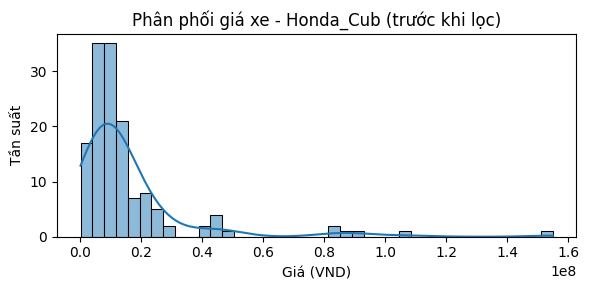

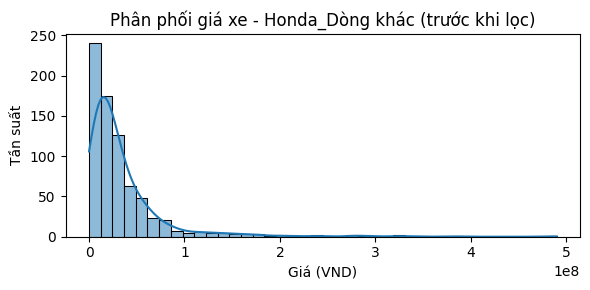

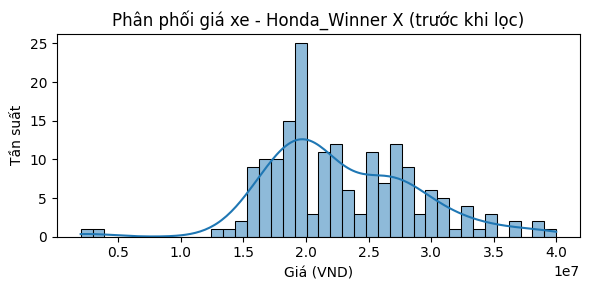

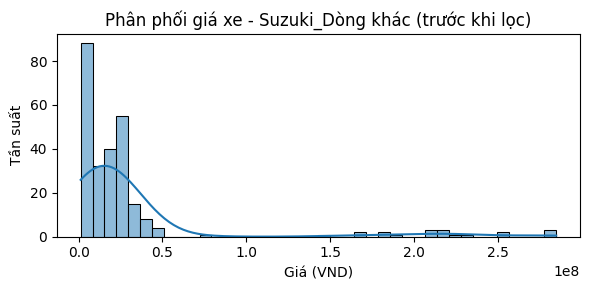

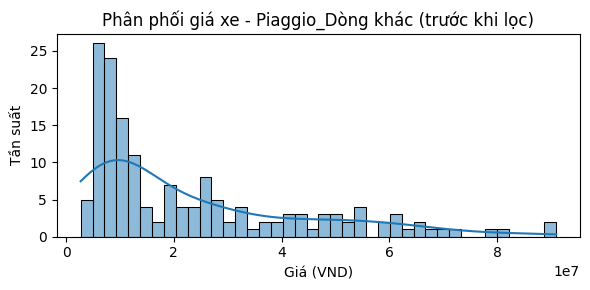

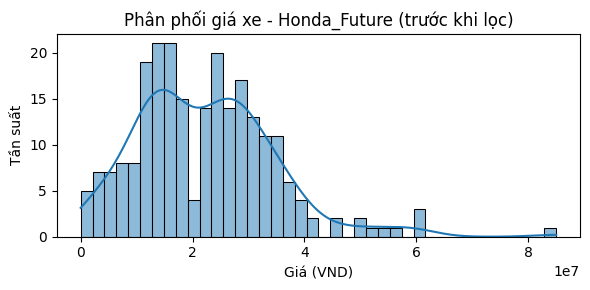

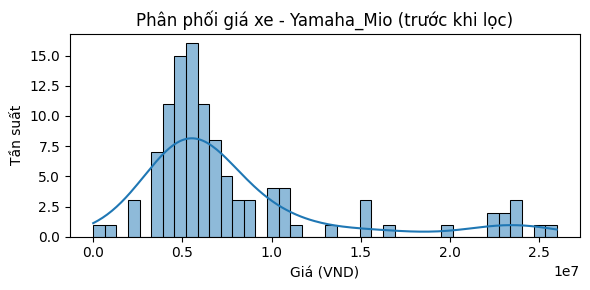

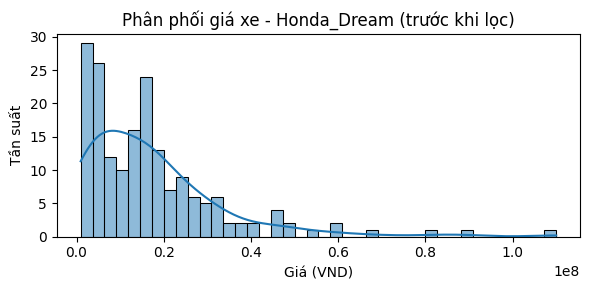

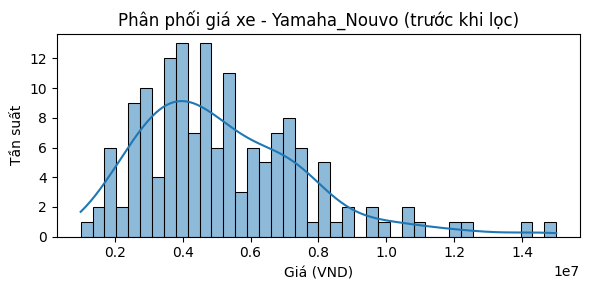

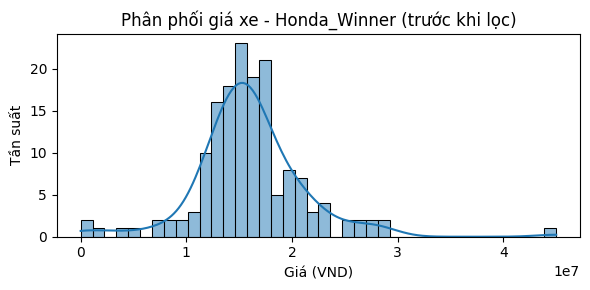

Trước lọc outlier: 6995 bản ghi


In [131]:
# Trực quan hóa các outlier theo phân khúc bằng histplot
# Biểu đồ tổng quan trước khi lọc

segments = df['segment'].unique()
for seg in segments:
    subset = df[df['segment'] == seg]
    plt.figure(figsize=(6,3))
    sns.histplot(subset['price'], bins=40, kde=True)
    plt.title(f"Phân phối giá xe - {seg} (trước khi lọc)")
    plt.xlabel("Giá (VND)")
    plt.ylabel("Tần suất")
    plt.tight_layout()

    # Save figure
    # filename = f"/content/gdrive/MyDrive/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/prep/seg_price_before/{seg}_price_after_filter.png"
    # filename = f"/content/gdrive/MyDrive/shared_folder/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/prep/seg_price_before/{seg}_price_after_filter.png"
    # plt.savefig(filename, dpi=300)

    plt.show()


print(f"Trước lọc outlier: {len(df)} bản ghi")

In [132]:
# Kiểm tra phân bố giá trước khi loại bỏ outlier
price_skew_before = skew(df['price'])
price_kurt_before = kurtosis(df['price'])
print(f"Before removing outliers: Skewness: {price_skew_before:.2f}, Kurtosis: {price_kurt_before:.2f}")

Before removing outliers: Skewness: 83.42, Kurtosis: 6968.15


In [133]:
# Lọc outliers theo segment
def remove_outliers_by_segment(data, col='price', lower_q=0.05, upper_q=0.95):
    cleaned_df = []
    for seg, group in data.groupby('segment'):
        q_low = group[col].quantile(lower_q)
        q_high = group[col].quantile(upper_q)
        filtered = group[(group[col] >= q_low) & (group[col] <= q_high)]
        cleaned_df.append(filtered)
        print(f"{seg:<25} | Before: {len(group):4} | After: {len(filtered):4} | Kept: {len(filtered)/len(group)*100:.1f}%")
    return pd.concat(cleaned_df, ignore_index=True)

df = remove_outliers_by_segment(df, 'price', lower_q=0.1, upper_q=0.9)

print(f"After removing outliers: {len(df)} entries")

Honda_Air Blade           | Before:  603 | After:  484 | Kept: 80.3%
Honda_Cub                 | Before:  143 | After:  113 | Kept: 79.0%
Honda_Dream               | Before:  182 | After:  144 | Kept: 79.1%
Honda_Dòng khác           | Before:  745 | After:  596 | Kept: 80.0%
Honda_Future              | Before:  238 | After:  191 | Kept: 80.3%
Honda_Lead                | Before:  205 | After:  163 | Kept: 79.5%
Honda_SH                  | Before:  627 | After:  501 | Kept: 79.9%
Honda_Vario               | Before:  226 | After:  180 | Kept: 79.6%
Honda_Vision              | Before:  281 | After:  233 | Kept: 82.9%
Honda_Wave                | Before:  725 | After:  581 | Kept: 80.1%
Honda_Winner              | Before:  157 | After:  125 | Kept: 79.6%
Honda_Winner X            | Before:  177 | After:  144 | Kept: 81.4%
Hãng khác_Dòng khác       | Before:  381 | After:  306 | Kept: 80.3%
Kawasaki_Dòng khác        | Before:   52 | After:   40 | Kept: 76.9%
Piaggio_Dòng khác         | Before

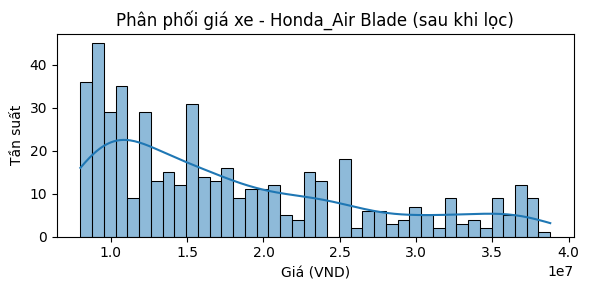

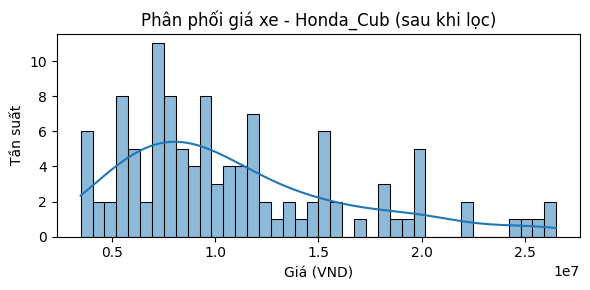

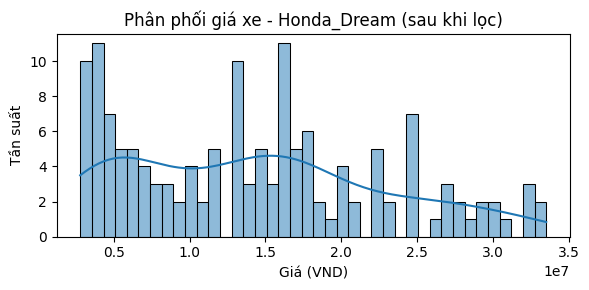

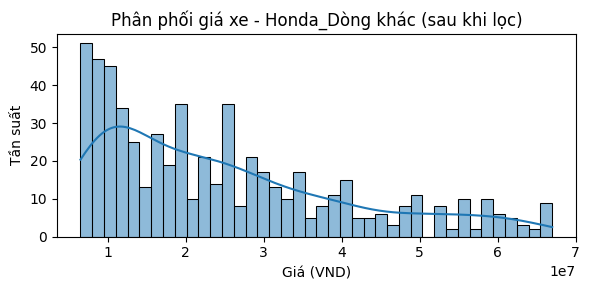

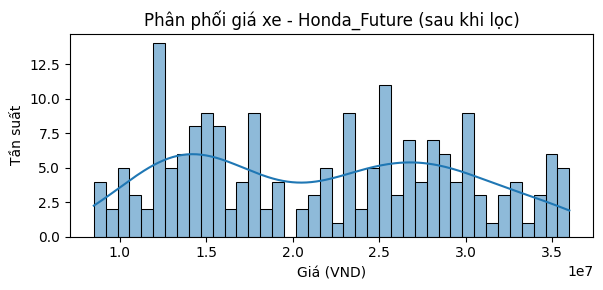

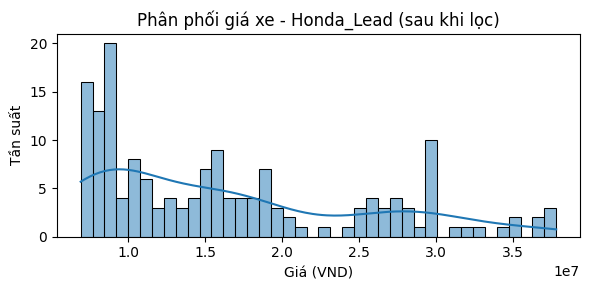

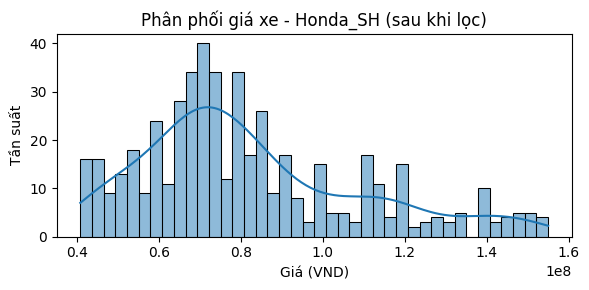

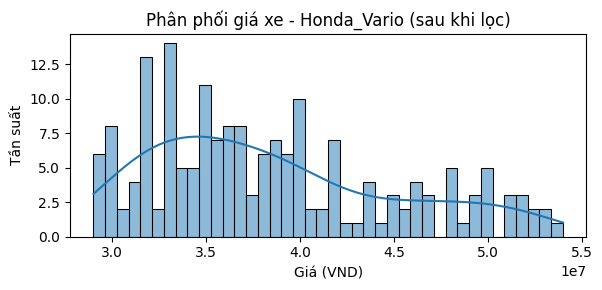

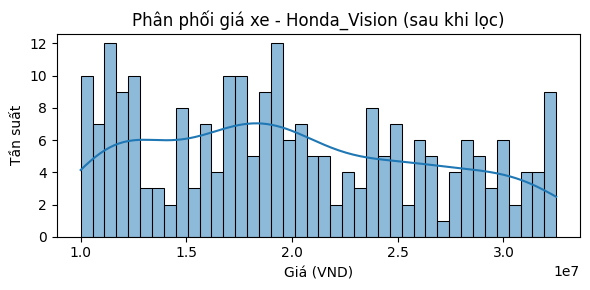

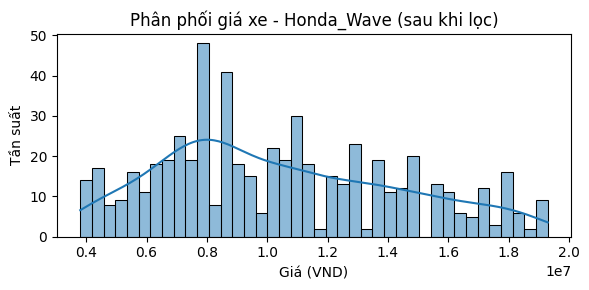

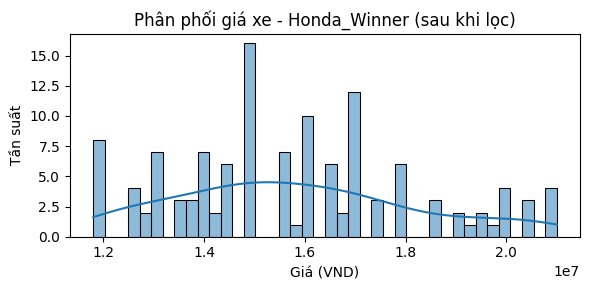

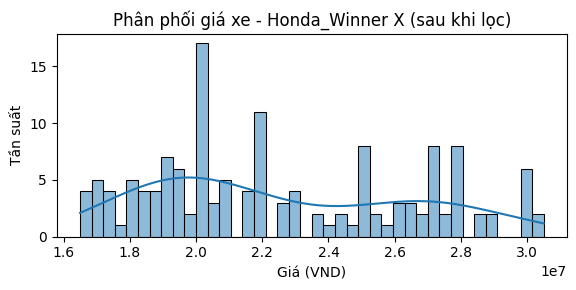

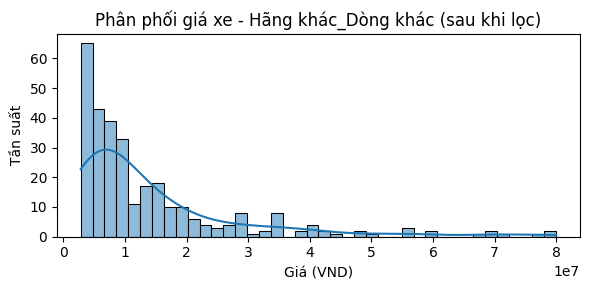

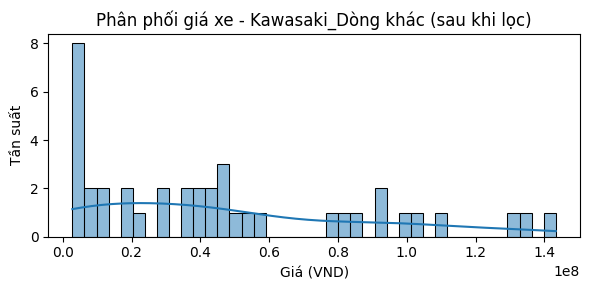

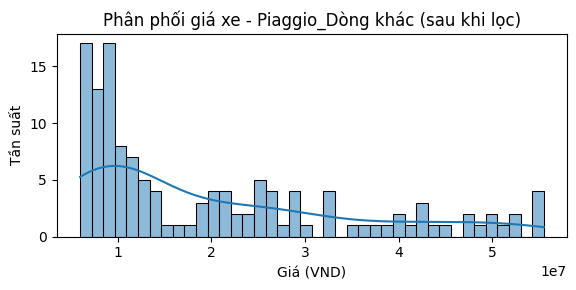

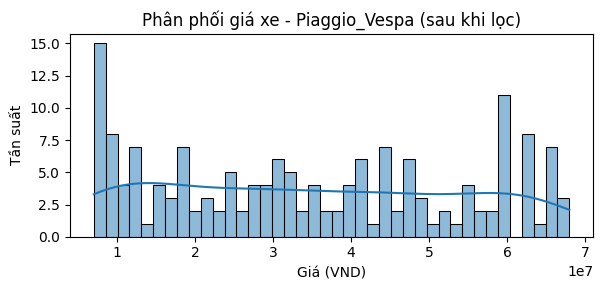

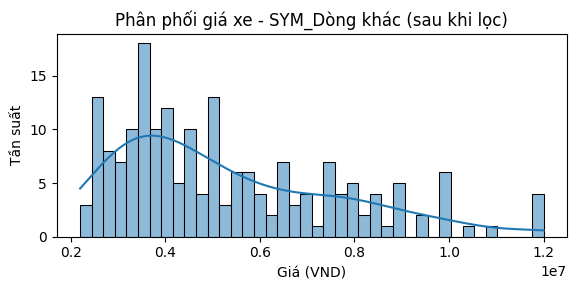

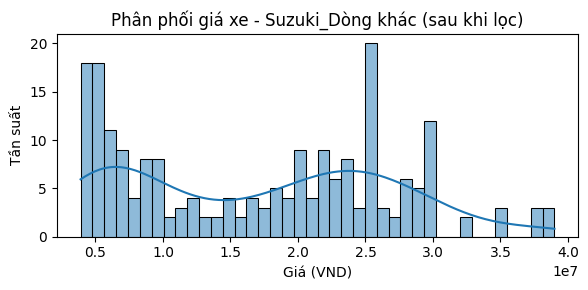

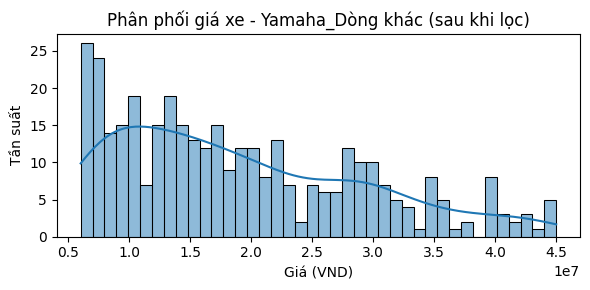

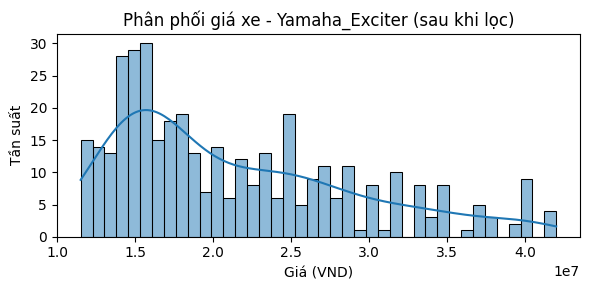

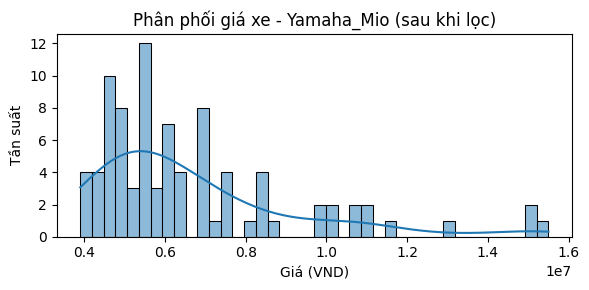

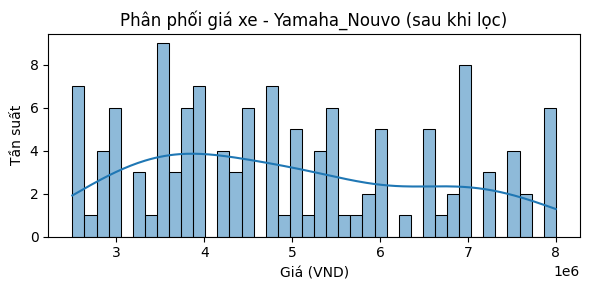

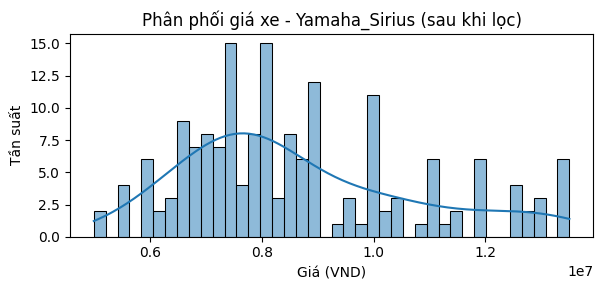

Sau khi lọc outliers: 5626 bản ghi


In [134]:
# Trực quan hóa sau khi loại bỏ outlier của price trong mỗi segment
segments = df['segment'].unique()
for seg in segments:
    subset = df[df['segment'] == seg]
    plt.figure(figsize=(6,3))
    sns.histplot(subset['price'], bins=40, kde=True)
    plt.title(f"Phân phối giá xe - {seg} (sau khi lọc)")
    plt.xlabel("Giá (VND)")
    plt.ylabel("Tần suất")
    plt.tight_layout()

    # Save figure
    # filename = f"/content/gdrive/MyDrive/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/prep/seg_price_after/{seg}_price_after_filter.png"
    # filename = f"/content/gdrive/MyDrive/shared_folder/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/prep/seg_price_after/{seg}_price_after_filter.png"
    # plt.savefig(filename, dpi=300)

    plt.show()

print(f"Sau khi lọc outliers: {len(df)} bản ghi")

In [135]:
price_skew_after = skew(df['price'])
price_kurt_after = kurtosis(df['price'])
print(f"Sau lọc: Skewness: {price_skew_after:.2f}, Kurtosis: {price_kurt_after:.2f}")

Sau lọc: Skewness: 2.41, Kurtosis: 6.92


In [136]:
df['segment'].value_counts()

segment
Honda_Dòng khác        596
Honda_Wave             581
Honda_SH               501
Honda_Air Blade        484
Yamaha_Exciter         384
Yamaha_Dòng khác       363
Hãng khác_Dòng khác    306
Honda_Vision           233
Suzuki_Dòng khác       209
Honda_Future           191
SYM_Dòng khác          191
Honda_Vario            180
Yamaha_Sirius          171
Piaggio_Vespa          163
Honda_Lead             163
Honda_Dream            144
Honda_Winner X         144
Piaggio_Dòng khác      132
Honda_Winner           125
Yamaha_Nouvo           125
Honda_Cub              113
Yamaha_Mio              87
Kawasaki_Dòng khác      40
Name: count, dtype: int64

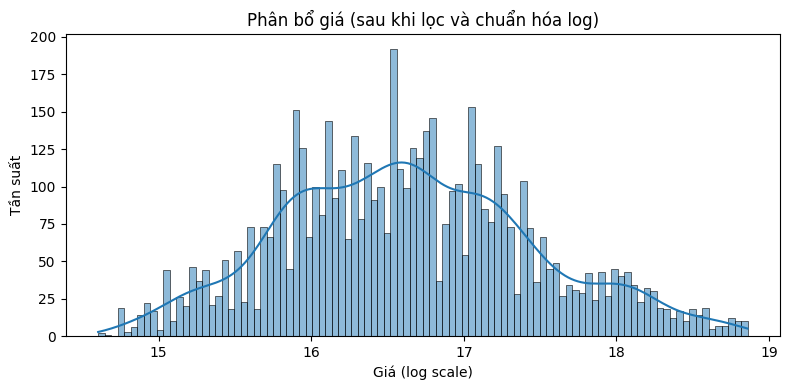

In [137]:
# # Creating new feature mean price by brand (log_price trung bình theo brands)
# brand_mean = df.groupby('brand')['price'].mean().rename('brand_meanprice')
# df = df.merge(brand_mean, on='brand', how='left')

# Chuẩn hóa log price do phân bổ lệch bên phải
df['log_price'] = np.log1p(df['price'])  # target
brand_mean_log = df.groupby('brand')['log_price'].mean().rename('brand_meanprice')
df = df.merge(brand_mean_log, on='brand', how='left')

# Kiểm tra
plt.figure(figsize=(8,4))
sns.histplot(df['log_price'], bins=100, kde=True)
plt.title('Phân bổ giá (sau khi lọc và chuẩn hóa log)')
plt.xlabel('Giá (log scale)')
plt.ylabel('Tần suất')
plt.tight_layout()

# Lưu hình
# filename = f"/content/gdrive/MyDrive/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/feature_eng/price_after_filter_and_log.png"
# filename = f"/content/gdrive/MyDrive/shared_folder/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/feature_eng/price_after_filter_and_log.png"
# plt.savefig(filename, dpi=300)

plt.show()

In [138]:
# Kiểm tra trùng
df.duplicated().sum()

66

In [139]:
# Xóa dòng trùng
df = df.drop_duplicates().reset_index(drop=True)

In [140]:
df.head(3)

,price,min_price,max_price,brand,model,registration_year,mileage_km,bike_type,engine_capacity,origin,age,brand_grouped,model_grouped,segment,log_price,brand_meanprice
0,16000000.0,13830000.0,16240000.0,Honda,Air Blade,2013.0,80000,Tay ga,100 - 175 cc,Việt Nam,12.0,Honda,Air Blade,Honda_Air Blade,16.588099,16.822641
1,11000000.0,36710000.0,43100000.0,Honda,Air Blade,2023.0,70000,Tay ga,100 - 175 cc,Nhật Bản,2.0,Honda,Air Blade,Honda_Air Blade,16.213406,16.822641
2,10800000.0,8600000.0,10100000.0,Honda,Air Blade,2009.0,51000,Tay ga,100 - 175 cc,Việt Nam,16.0,Honda,Air Blade,Honda_Air Blade,16.195057,16.822641


In [141]:
# Prepare features for regression
cat_cols = ['segment','bike_type','origin','engine_capacity']
num_cols = ['age','mileage_km','min_price','max_price','brand_meanprice']

In [142]:
# Fillna cho num và cat col
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for c in cat_cols:
    df[c] = df[c].fillna('NA')

In [143]:
df.head(3)

,price,min_price,max_price,brand,model,registration_year,mileage_km,bike_type,engine_capacity,origin,age,brand_grouped,model_grouped,segment,log_price,brand_meanprice
0,16000000.0,13830000.0,16240000.0,Honda,Air Blade,2013.0,80000,Tay ga,100 - 175 cc,Việt Nam,12.0,Honda,Air Blade,Honda_Air Blade,16.588099,16.822641
1,11000000.0,36710000.0,43100000.0,Honda,Air Blade,2023.0,70000,Tay ga,100 - 175 cc,Nhật Bản,2.0,Honda,Air Blade,Honda_Air Blade,16.213406,16.822641
2,10800000.0,8600000.0,10100000.0,Honda,Air Blade,2009.0,51000,Tay ga,100 - 175 cc,Việt Nam,16.0,Honda,Air Blade,Honda_Air Blade,16.195057,16.822641


In [144]:
# Scale num col
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(
    scaler.fit_transform(df[num_cols]),
    columns=num_cols,
    index=df.index
)

In [145]:
# Mã hóa các biến phân loại
# One-hot encode
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

In [146]:
# Prepare features and target (câu 1 ML truyền thống)
X = pd.concat([df_encoded, df_scaled_num], axis=1)
# Log-transform
y_col = 'log_price'
y = df[y_col]

In [147]:
df_final = pd.concat([X,y], axis=1)

### 4. Model

In [148]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
# Train model bằng RandomForestRegressor để lấy feature importance
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

In [150]:
# Model evaluation
# Chuyển đổi qua giá thực
y_test_real = np.expm1(y_test) # reverse from log
y_pred_real = np.expm1(model.predict(X_test))

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
mae_real = mean_absolute_error(y_test_real, y_pred_real)
rmse_real = root_mean_squared_error(y_test_real, y_pred_real)
r2_real = r2_score(y_test_real, y_pred_real)

print(f"MAE (VND): {mae_real:,.0f}")
print(f"RMSE (VND): {rmse_real:,.0f}")
print(f"R2 (VND): {r2_real:.3f}") # R2 khi dùng giá thực sự để predict

MAE (VND): 4,381,833
RMSE (VND): 7,635,810
R2 (VND): 0.888


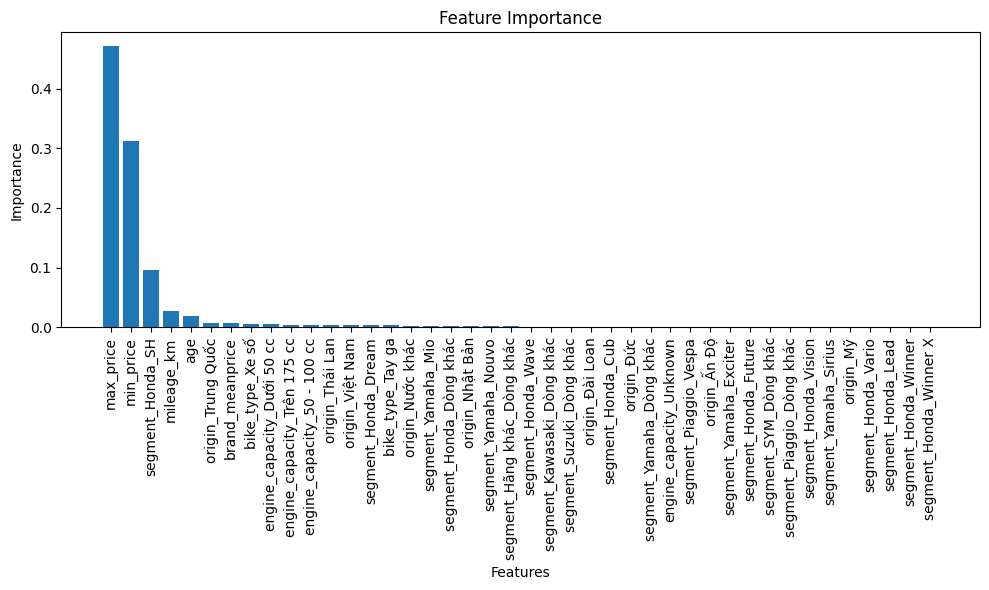

Top 10 most important features: Index(['max_price', 'min_price', 'segment_Honda_SH', 'mileage_km', 'age',
       'origin_Trung Quốc', 'brand_meanprice', 'bike_type_Xe số',
       'engine_capacity_Dưới 50 cc', 'engine_capacity_Trên 175 cc'],
      dtype='object')


In [151]:
# Kiểm tra feature quan trọng
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

feature_names = feature_names[sorted_indices]
importances = importances[sorted_indices]

# Lấy ra 10 feature quan trọng nhất
top_n = 10
top_features = feature_names[:top_n]
top_importances = importances[:top_n]
print(f"Top 10 most important features: {top_features}")

max_price chiếm ưu thế: trần giá hoặc phạm vi giá tối đa giải thích phần lớn sự biến thiên.
min_price và segment_Honda_SH đứng thứ hai: điều này gợi ý rằng giá xe thuộc phân khúc Honda SH ảnh hưởng đáng kể đến giá dự đoán.
mileage_km cũng quan trọng: mức sử dụng ảnh hưởng đến giá.

Mô hình đặt trọng số mạnh nhất vào min_price, max_price, trong khi segment và mileage_km đóng góp thứ cấp nhưng vẫn đáng kể.

In [152]:
# Kiểm tra metrics khi dự đoán trên tập dữ liệu train/test
print("Check the train/test dataset:")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

y_train_real = np.expm1(y_train)
y_pred_train_real = np.expm1(model.predict(X_train))

y_test_real = np.expm1(y_test)
y_pred_test_real = np.expm1(model.predict(X_test))

mae_train_real = mean_absolute_error(y_train_real, y_pred_train_real)
rmse_train_real = root_mean_squared_error(y_train_real, y_pred_train_real)
r2_train_real = r2_score(y_train_real, y_pred_train_real)

mae_test_real = mean_absolute_error(y_test_real, y_pred_test_real)
rmse_test_real = root_mean_squared_error(y_test_real, y_pred_test_real)
r2_test_real = r2_score(y_test_real, y_pred_test_real)

print(f"MAE train (VND): {mae_train_real:,.0f}, RMSE train (VND): {rmse_train_real:,.0f}, R2 train: {r2_train_real:.3f}")
print(f"MAE test (VND): {mae_test_real:,.0f}, RMSE test (VND): {rmse_test_real:,.0f}, R2 test: {r2_test_real:.3f}")

Check the train/test dataset:
(4448, 42) (1112, 42)
(4448,) (1112,)
MAE train (VND): 2,918,940, RMSE train (VND): 4,761,782, R2 train: 0.959
MAE test (VND): 4,381,833, RMSE test (VND): 7,635,810, R2 test: 0.888


R2 trên tập train cao hơn tập test, cho thấy hiện tượng overfitting. Cân nhắc chọn lọc feature theo feature importance

In [153]:
df_top_feature = df_final[top_features]
df_top_feature['log_price'] = df_final['log_price']

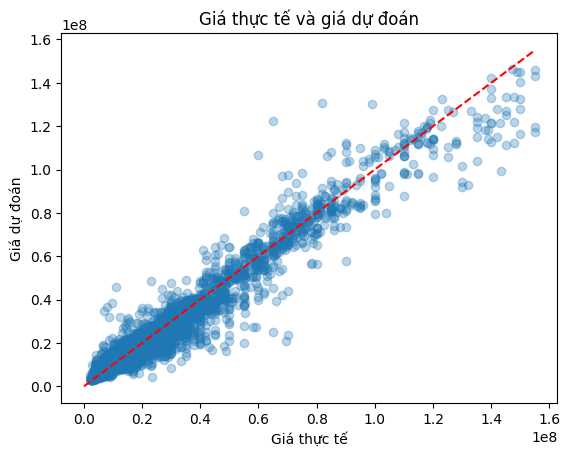

In [154]:
# Vẽ trực quan kết quả dự đoán và thực tế
# Predict lại toàn bộ để lấy residual
df['price_hat'] = np.expm1(model.predict(X))
plt.scatter(df['price'], df['price_hat'], alpha=0.3)
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("Giá thực tế và giá dự đoán")
plt.plot([0, df['price'].max()], [0, df['price'].max()], 'r--')

# plt.savefig("/content/gdrive/MyDrive/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/model/actual_vs_predicted.png")
# plt.savefig("/content/gdrive/MyDrive/shared_folder/DL07_K308_VuThiNgocAnhHV1_NguyenPhamQuynhAnhHV2/Project 1/pic/model/actual_vs_predicted.png")

plt.show()

In [155]:
# Đanh giá mỗi phân khúc

from sklearn.metrics import mean_absolute_percentage_error

def segment_metrics(x):
    r2 = r2_score(x['price'], x['price_hat'])
    mae = mean_absolute_error(x['price'], x['price_hat'])
    rmse = root_mean_squared_error(x['price'], x['price_hat'])
    mape = mean_absolute_percentage_error(x['price'], x['price_hat']) * 100
    count = len(x)
    return pd.Series({'R2': r2, 'MAE': mae, 'RMSE': rmse, 'MAPE (%)': mape, 'count': count})

seg_metrics = df.groupby('segment').apply(segment_metrics).reset_index()
print(seg_metrics.sort_values('R2', ascending=False).head(30))


                segment        R2           MAE          RMSE   MAPE (%)  \
5            Honda_Lead  0.914645  1.777799e+06  2.521670e+06  11.834854   
13   Kawasaki_Dòng khác  0.909000  6.691347e+06  1.222959e+07  20.593690   
14    Piaggio_Dòng khác  0.904254  3.145467e+06  4.461082e+06  17.442161   
15        Piaggio_Vespa  0.869100  5.137581e+06  6.980171e+06  18.552384   
6              Honda_SH  0.838861  7.404571e+06  1.078540e+07   9.169602   
8          Honda_Vision  0.836076  1.985728e+06  2.636984e+06  10.620752   
18     Yamaha_Dòng khác  0.829995  2.655104e+06  4.205990e+06  15.597919   
3       Honda_Dòng khác  0.816268  4.141408e+06  6.628048e+06  19.219140   
17     Suzuki_Dòng khác  0.809193  2.618471e+06  4.230408e+06  18.243948   
0       Honda_Air Blade  0.769112  2.692665e+06  4.128552e+06  17.081920   
12  Hãng khác_Dòng khác  0.760602  3.513314e+06  7.138178e+06  25.148317   
16        SYM_Dòng khác  0.713524  8.937809e+05  1.249862e+06  18.014462   
2           

#### => Thử dự đoán với random forest cho kết quả khá tốt, tuy nhiên có sự dự đoán chênh lệch khá nhiều giữa các dòng sản phẩm

In [156]:
# Thử với các model khác
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [157]:
# List of models
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(max_depth=12, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=12, random_state=42),
    "SVR": SVR(C=10, gamma='scale')
}


In [158]:
# DataFrame lưu kết quả
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # convert về giá thực tế
    y_test_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred)

    mae = mean_absolute_error(y_test_real, y_pred_real)
    rmse = root_mean_squared_error(y_test_real, y_pred_real)
    r2 = r2_score(y_test_real, y_pred_real)

    results.append({
        "Model": name,
        "R2 (VND)": r2,
        "MAE (VND)": mae,

        "RMSE (VND)": rmse
    })

In [159]:
# Hiển thị kết quả
results_df = pd.DataFrame(results).sort_values("R2 (VND)", ascending=False)
print(results_df)

              Model  R2 (VND)     MAE (VND)    RMSE (VND)
2      RandomForest  0.888230  4.381833e+06  7.635810e+06
4               SVR  0.871966  4.607360e+06  8.172498e+06
3  GradientBoosting  0.851320  4.884985e+06  8.806793e+06
1      DecisionTree  0.813617  5.319813e+06  9.860408e+06
0  LinearRegression  0.731268  6.343373e+06  1.184001e+07


#### => Random forest vẫn cho kết quả tốt nhất

In [160]:
# Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=30,       # number of random combinations to test
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,       # use all CPU cores
    random_state=42,
    verbose=2,
)

# Fit on training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [161]:
# Best model found
best_rf = random_search.best_estimator_

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best CV score
print("Best CV R²:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
Best CV R²: 0.846253361998264


In [162]:
# Dự đoán trên tập test và kiểm tra metrics

y_pred = best_rf.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

Test MAE: 0.2188707034961812
Test RMSE: 0.3066610786756672
Test R²: 0.8626311585112774


In [163]:
# Thử dùng Random forest trên tập top 10 feature
# Tham số như RF ban đầu
X_top_feature = df_top_feature[top_features]
y_top_feature = df_top_feature.drop(columns=top_features)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_feature, y_top_feature, test_size=0.2, random_state=42)

model_top = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
model_top.fit(X_train_top, y_train_top)

y_pred_top = model_top.predict(X_test_top)

print("Test MAE:", mean_absolute_error(y_test_top, y_pred_top))
print("Test RMSE:", root_mean_squared_error(y_test_top, y_pred_top))
print("Test R²:", r2_score(y_test_top, y_pred_top))


Test MAE: 0.23703003328925243
Test RMSE: 0.34358967796056145
Test R²: 0.827554790420574


In [164]:
# Tham số như best RF model
model_top_best = RandomForestRegressor(
    n_estimators=random_search.best_params_['n_estimators'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    max_features=random_search.best_params_['max_features'],
    random_state=42,
    n_jobs=-1)

model_top_best.fit(X_train_top, y_train_top)

y_pred_top_best = model_top_best.predict(X_test_top)

print("Test MAE:", mean_absolute_error(y_test_top, y_pred_top_best))
print("Test RMSE:", root_mean_squared_error(y_test_top, y_pred_top_best))
print("Test R²:", r2_score(y_test_top, y_pred_top_best))

Test MAE: 0.22776291437948448
Test RMSE: 0.32825169935275994
Test R²: 0.8426071918880556


Nhận xét: Sử dụng top 10 feature không cải thiện model, có thể phải tune lại nhưng để sau đi =-=